## Visualising Simpson's Paradox using Iris Data

Inspired by: [MinutePhysics' Video on Simpson's Paradox](https://www.youtube.com/watch?v=ebEkn-BiW5k)

I thought this was a cool video, and then I read an interesting paper where they tried to [detect Simpson's Paradox in several datasets](https://aaai.org/ocs/index.php/FLAIRS/FLAIRS18/paper/view/17641), including the Iris dataset. So I decided to check out Simpson's Paradox in the Iris dataset by myself

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

import itertools
from scipy.stats import pearsonr

/Users/sachita/miniconda3/envs/mlenv/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
# Using the Iris Dataset
iris=load_iris()

# Create feature vector - each column is one of the following features: 
# Sepal Length, Sepal Width, Petal Length and Petal Width 
iris_features = iris.data

# Create target vector - a flower can be in one of 3 classes:
# Setosa, Versicolour, and Virginica
iris_class = iris.target

In [3]:
# Dict of Individual Features

feature_dict = {'sepal_length':iris_features[:, 0], 
                'sepal_width':iris_features[:, 1],
                'petal_length':iris_features[:, 2], 
                'petal_width':iris_features[:, 3]}


### Plot all features pairwise with their line of best-fit for classes and overall data

In [6]:
def plot_feature_correlations(feature_dict, f1_title, f2_title, **kwargs):
    
    f1 = feature_dict[f1_title]
    f2 = feature_dict[f2_title]    
    
    plot_colors = ['xkcd:azure', 'xkcd:gold', 'crimson']
    plot_markers = ['o', '+', 'v']
    
    plot_title = f1_title + " versus " + f2_title
    plt.figure(figsize=(10, 8))
    plt.title(plot_title)
    plt.xlabel(f1_title)
    plt.ylabel(f2_title)

    class_pcc = []

    for i in range(3):

        ax2 = sns.regplot(x=f1[iris_class==i], 
                          y=f2[iris_class==i], 
                          scatter=True,
                          color=plot_colors[i],
                          line_kws={'linestyle':"dotted", 'color':plot_colors[i]},
                          marker=plot_markers[i],
                          ci=None)

        corr, _ = pearsonr(f1[iris_class==i], f2[iris_class==i])
        class_pcc.append(float('%.3f' % corr))

    ax2.legend(('Iris Setosa', 'Iris Versicolour', 'Iris Virginica'))

    ax3 = sns.regplot(x=f1, 
                     y=f2, 
                     scatter=False,
                     line_kws={'linestyle':"dotted", 'color':'black'},
                     ci=None)

    corr, _ = pearsonr(f1, f2)
    print('Overall Pearsons correlation: %.3f' % corr)
    print('Pearsons Correlation for Individual Classes: ', class_pcc)

Overall Pearsons correlation: -0.118
Pearsons Correlation for Individual Classes:  [0.743, 0.526, 0.457]


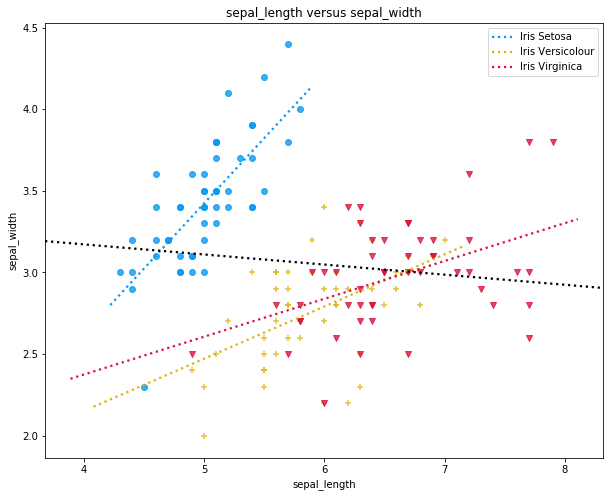

In [7]:
plot_feature_correlations(feature_dict, 'sepal_length', 'sepal_width')

Overall Pearsons correlation: 0.872
Pearsons Correlation for Individual Classes:  [0.267, 0.754, 0.864]


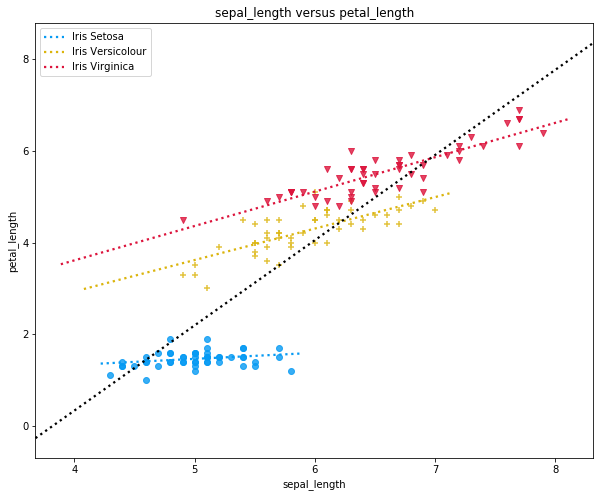

In [8]:
plot_feature_correlations(feature_dict, 'sepal_length', 'petal_length')

Overall Pearsons correlation: 0.818
Pearsons Correlation for Individual Classes:  [0.278, 0.546, 0.281]


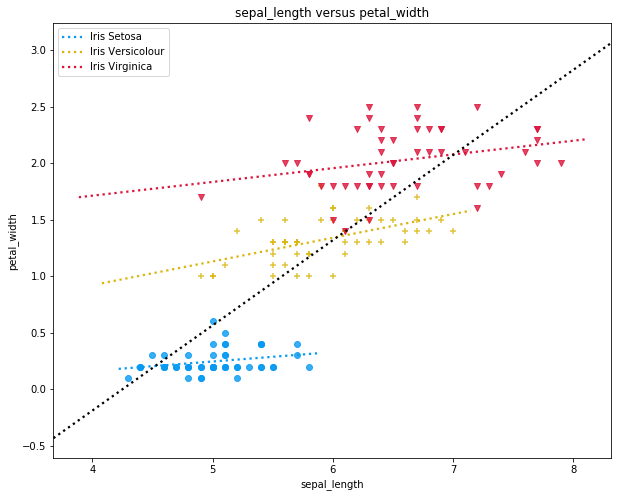

In [9]:
plot_feature_correlations(feature_dict, 'sepal_length', 'petal_width')

Overall Pearsons correlation: -0.428
Pearsons Correlation for Individual Classes:  [0.178, 0.561, 0.401]


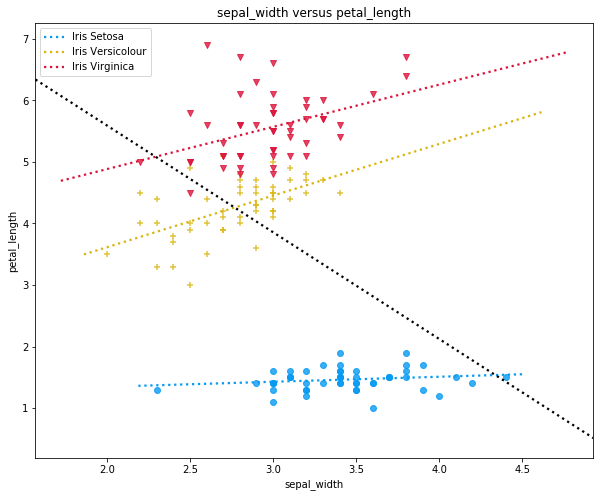

In [10]:
plot_feature_correlations(feature_dict, 'sepal_width', 'petal_length')

Overall Pearsons correlation: -0.366
Pearsons Correlation for Individual Classes:  [0.233, 0.664, 0.538]


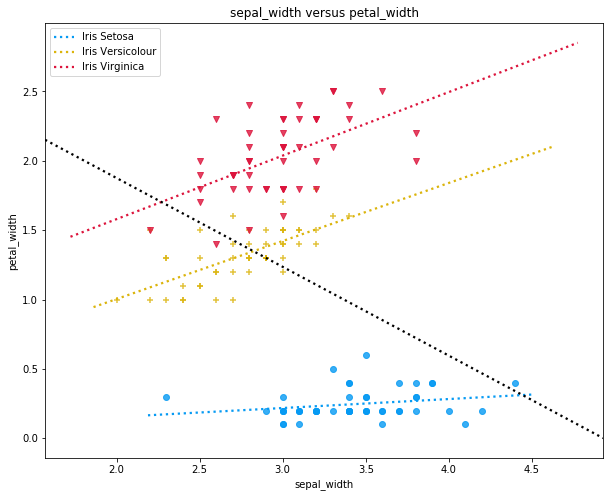

In [11]:
plot_feature_correlations(feature_dict, 'sepal_width', 'petal_width')

Overall Pearsons correlation: 0.963
Pearsons Correlation for Individual Classes:  [0.332, 0.787, 0.322]


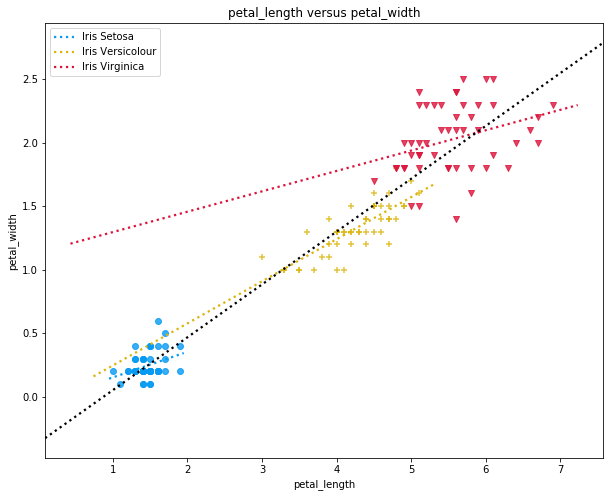

In [12]:
plot_feature_correlations(feature_dict, 'petal_length', 'petal_width')

## Animating an Instance of Simpson's Paradox

Inspired by [this pretty gif](https://commons.wikimedia.org/wiki/File:Simpsons_paradox_-_animation.gif) I found on Wikimedia Commons